<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises
* Notebook completed by Adam Lang as a fundamentals review of PyTorch from the great Daniel Bourke's PyTorch for Deep Learning bootcamp.

# Overview
The following is a collection of exercises based on computer vision fundamentals in PyTorch.



## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Apr  9 17:37:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu124


'cuda'

## What are 3 areas in industry where computer vision is currently being used?

This list covers key areas where real-world computer vision applications are being utilized in 2024 [source](https://medium.com/@bosctechlabs/what-are-some-real-world-applications-of-computer-vision-2024-4879a740ff29)

1. Healthcare and Medical Imaging
2. Autonomous Vehicles and Transportation
3. Retail and E-commerce
4. Agriculture and Farming
5. Security and Surveillance
6. Manufacturing and Industry
7. Augmented Reality (AR) and Gaming
....and the list goes on...

##  What is overfitting in machine learning?
* Overfitting occurs when a model learns the training data too well, including noise and irrelevant details, leading to poor performance on new, unseen data.
* It's analagous to memorizing the answers to a specific test instead of understanding the underlying concepts.

### Causes of Overfitting
1. Model complexity
  * A model that's too complex for the amount of data can capture noise and irrelevant patterns.

2. Insufficient data
  * A small training dataset can lead to a model memorizing the data rather than learning generalizable patterns.

3. Noisy data
  * Irrelevant or incorrect data points in the training set can be learned by the model, leading to poor generalization.

### How to detect Overfitting?
1. Training-validation gap
  * If the model performs much better on the training data than on a separate validation or test set, it's a strong indicator of overfitting.

2. High variance
  * Overfitted models tend to have high variance, meaning their performance varies significantly across different datasets.

### How to prevent Overfitting?


1. Regularization
  * Techniques like L1 and L2 regularization can penalize complex models, encouraging them to learn simpler, more generalizable patterns.
  * One of the reasons for overfitting is large weights in the neural network.
    * A network with large network weights can be a sign of an unstable network where small changes in the input can lead to large changes in the output.
    * A solution to this problem is to update the learning algorithm to encourage the network to keep the weights small --> This is called regularization!!!!
  * Batch Normalization and Dropout can also help with this.

2. Cross-validation
  * Using techniques like k-fold cross-validation can help assess the model's performance on different subsets of the data, providing a more robust estimate of its generalization ability.

3. More data
  * Increasing the size of the training dataset can help the model learn more generalizable patterns.

4. Simpler Machine Learning models
  * Choosing a model that's appropriate for the complexity of the problem can prevent overfitting.

5. Early stopping
  * Monitoring the model's performance on a validation set during training and stopping the training process when the performance starts to degrade can prevent overfitting.

6. Feature selection
  * Removing irrelevant or redundant features can help the model focus on the most important information.

7. Ensemble methods
  * Combining multiple models can help create a more robust and generalizable model.


### Overfitting Visualized
* This is a great visualization of over vs. underfitting from Google:

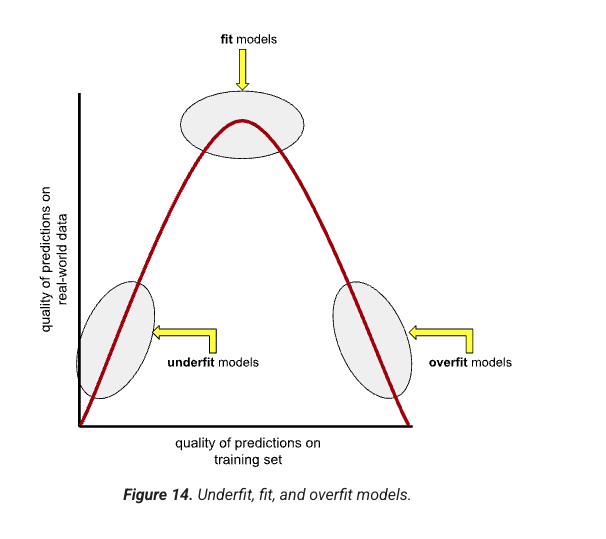


* [Source above: Google Developers blog](https://developers.google.com/machine-learning/crash-course/overfitting/overfitting#:~:text=Overfitting%20means%20creating%20a%20model,worthless%20in%20the%20real%20world.)

# Computer Vision Coding
* Time to code this out in PyTorch.

## Import Dependencies

In [3]:
## import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets ## datasets to work with
from torchvision import transforms
from torchvision.transforms import ToTensor ## image augmentation

# Data Sci imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

## check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
# Setup training data
from torchvision import datasets

## train dataset
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # we want train dataset (False=test data)
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), ## how do we want to transform the data?
    target_transform=None, # how do we want to transform the labels/targets?
)

## test dataset
test_data = datasets.FashionMNIST(
    root="data", ## root folder
    train=False, ## we need test data
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.6MB/s]


## Exploratory Data Analysis
* Visualize at least 5 different samples of the MNIST training dataset.

In [5]:
## lets see the lenght of our data
len(train_data), len(test_data)

(60000, 10000)

In [6]:
## lets see first sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
## lets view the class names
class_names = train_data.classes
pd.DataFrame(class_names)

,0
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


### Visualization

In [8]:
## check ndim of data
image, label = train_data[0]
image.ndim


3

In [9]:
## get shape
image.shape

torch.Size([1, 28, 28])

Image shape: torch.Size([1, 28, 28])


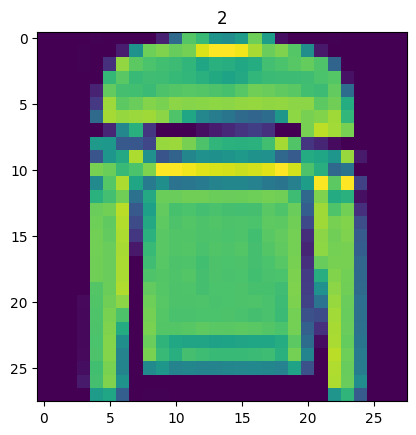

In [11]:
## visualize
import matplotlib.pyplot as plt
%matplotlib inline

## index first train_data image, label
image, label = train_data[5]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze());
plt.title(label);

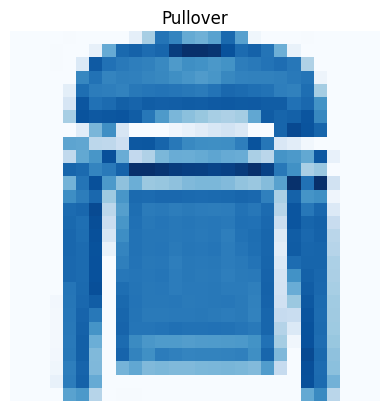

In [12]:
## view another image
plt.imshow(image.squeeze(), cmap="Blues")
plt.title(class_names[label])
plt.axis(False);

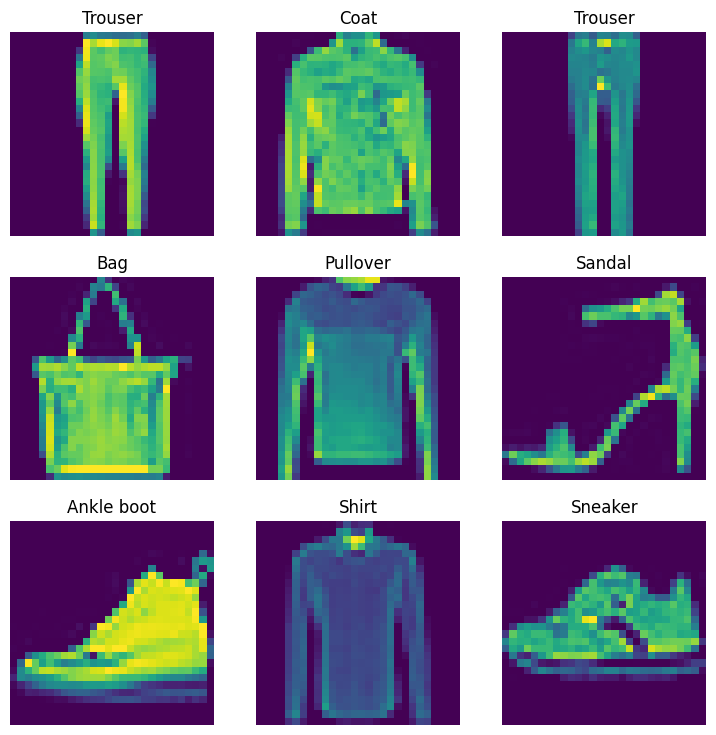

In [13]:
## lets grid plot these
## plot more images
#torch.manual_seed(42) ## set seed for reproducibility

## plot images
fig = plt.figure(figsize=(9,9)) ## 9 x 9 grid
rows, cols = 3,3
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze()) ## add cmap="" if want to change color
  plt.title(class_names[label])
  plt.axis(False)

## Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [14]:
## turn into datasets and dataloaders
from torch.utils.data import DataLoader

# Set batch size hyperparameter
BATCH_SIZE = 32

# DataLoaders (iterable batches)
## 1. Train DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) ## shuffle train set only


## 2. Test DataLoader
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) ## don't shuffle test set


## test if both are setup
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7da7a22d2b50>,
 <torch.utils.data.dataloader.DataLoader at 0x7da7a207b650>)

In [15]:
## check shape of batches in train and test dataloaders
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [16]:
32*1875

60000

In [17]:
## check contents of a batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Summary
* This means that we have

1. batch size --> 32
2. color channels --> 1
3. height --> 28
4. width --> 28

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


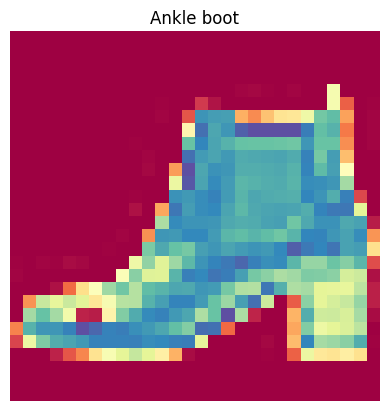

In [19]:
## lets see a sample of the train dataloader
torch.manual_seed(42)

## get random indexed image from train dataloader
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

## plot random img and label
plt.imshow(img.squeeze(), cmap="Spectral")
plt.title(class_names[label])
plt.axis(False) ## turn off axis
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

### TinyVGG CNN Model
* Tiny VGG is a small, lightweight convolutional neural network (CNN) architecture that was developed for **image classification tasks.**
* It has a smaller number of parameters and is simpler to train than the original VGG network, making it a good choice for situations where computational resources are limited.

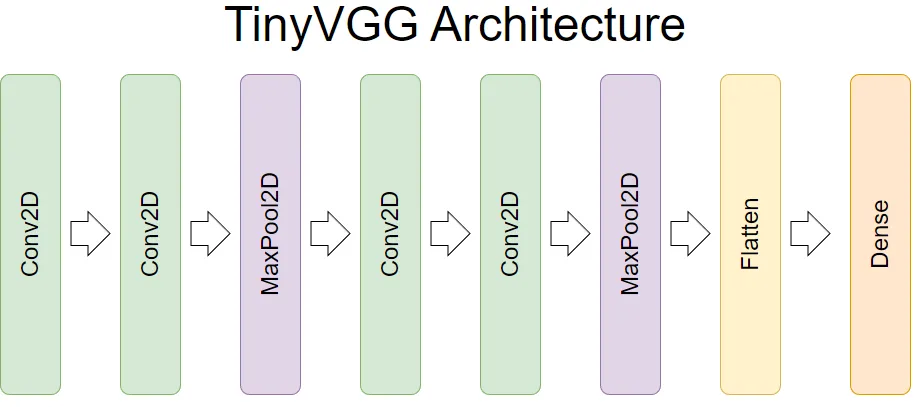

### CNN Hyperparameters - Review
* This is a quick review of the hyperparameters of the CNN model, [source](https://medium.com/@abhishekjainindore24/all-about-convolutions-kernels-features-in-cnn-c656616390a1)

1. Kernel or Filter
  * A kernel is a small 2D matrix.
  * The matrix contents are based upon the mathematical operations performed.
  * A kernel maps the input (image) by simple matrix multiplication and addition, * The output obtained is of lower dimensions and therefore easier to work with.
  * Kernels are usually always square (MxM) and always move left to right or top to bottom.

2. Stride
  * Stride tells the CNN model what steps to move the kernel.
  * A stride of 1 makes the kernel slide by 1 row/column at a time.
  * A stride of 2 moves kernel by 2 rows/columns.
...etc..


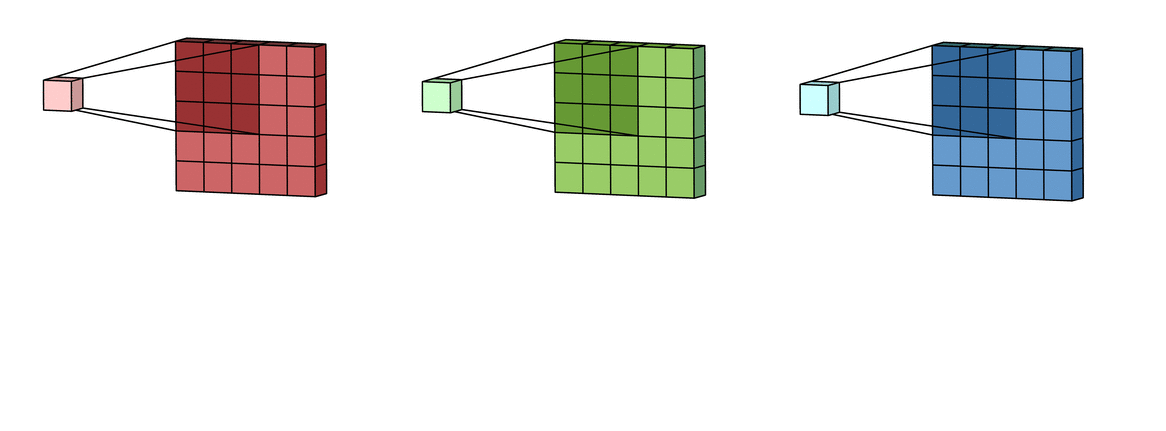

* The concept is that the kernel moves around each matrix convoluting and reducing the matrix based on the mathematical operation(s) to get a smaller matrix with the most important patterns or features extracted from the input object:

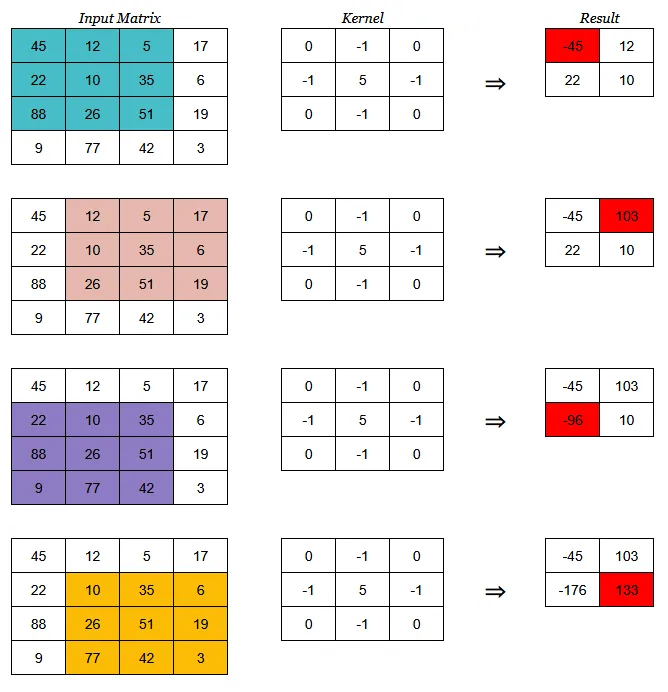

3. Padding
  * Padding is used to control the spatial output size and retain information at the borders of the input.
  * The goal of padding is to prevent shrinkage of the image/input object during convolution, and ensuring corner pixels participate in feature/pattern detection.
  * **Preventing Shrinkage**
    * Convolutional operations inherently reduce the spatial dimensions of the input (image).
    * Padding adds extra pixels around the edges, allowing the output to maintain the same spatial dimensions as the input, or at least control the output size.
  * **Preserving Border Information**
    * Without padding, the filters would mostly be applied to the central pixels of the image, potentially leading to a loss of information from the edges
    * Padding ensures corner pixels are also processed, allowing the network to learn features from the entire image, including the borders.

**Types of Padding**

1. **Valid Padding**
  * No padding is added, resulting in a smaller output size.

2. **Same Padding**
  * The output size is the same as the input size after convolution.
  * This is achieved by adding an appropriate amount of padding to the input.

3. **Zero-padding**
  * A very common type of padding where the added pixels are set to zero.
  * An Example of Zero padding in action:

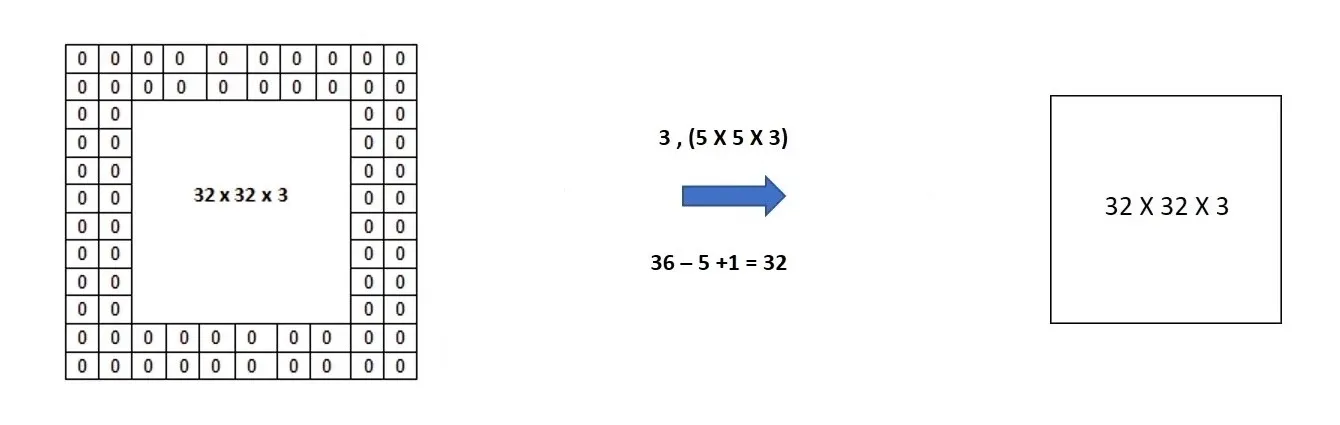

4. **Mirror padding**
  * Reflects input along its borders to expand the input.

5. **Wrap-around padding**
  * Works better than mirror padding if your input is spatially periodic.

6. **Random padding**
  * Randomizes the padding to prevent the model from learning it.

* [source above](https://shubhamchauhan125.medium.com/a-simple-explanation-to-filters-stride-and-padding-in-cnn-d0236d4a57ef)

In [22]:
## convolutional neural network `TinyVGG`
class TinyVGG(nn.Module):
  """
  CNN model architecture that mimics the `TinyVGG` model.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    ## Block layer 1
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, ## can be tuple (3,3)
                  stride=1,
                  padding=1), # values we can set ourselves == hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(), ## non-linear layer
        nn.MaxPool2d(kernel_size=2), # Takes Max value of input
    )
      ## Block layer 2
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(), ## non-linear layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(), ## non-linear layer
        nn.MaxPool2d(kernel_size=2),
    )
    ## Build classifier layer
    self.classifier = nn.Sequential(
        nn.Flatten(), ## flatten to single layer
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this value
                  out_features=output_shape) ## len(classes)

    )

  ## Forward pass
  def forward(self, x: torch.Tensor):
    ## forward propagation
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [23]:
## instantiate the model
torch.manual_seed(42)

## setup model
vgg_model = TinyVGG(input_shape=1,
                    hidden_units=10,
                    output_shape=len(class_names)).to(device)

vgg_model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

### Setup loss, optimizer and evaluation metrics

* Loss function
  * Since we are working with multiclass data, the loss function is `nn.CrossEntropyLoss()`

* Optimizer
  * `torch.optim.SGD()` (stochastic gradient descent)

* Evaluation Metric
  * Since we are working on a classification problem, let's use `accuracy` as the metric.
  * Options for eval metrics:

    1. Torchmetrics: https://lightning.ai/docs/torchmetrics/stable/classification/accuracy.html

    2. Hugging Face Eval library

    3. Sklearn library

    4. Download/import accuracy metric from Daniel Bourke's helper function github.
      * We will use this as part of Daniel's bootcamp.
      * This is a more modular way to do this as we can reuse functions and classes from other programs.

In [24]:
## lets get the accuracy function from Daniel's github
import requests
from pathlib import Path

## download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  ## 1. get raw github url of .py file
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  ## 2. open file
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [26]:
## import accuracy metric from helper_functions.py
from helper_functions import accuracy_fn

## 1. setup loss function
loss_fn = nn.CrossEntropyLoss() ## multiclass classification

## 2. setup optiimizer
optimizer = torch.optim.SGD(params=vgg_model.parameters(),
                            lr=0.1)

### Create Function to Time Experiments
* machine learning is very experimental
* There are 2 things that we often want to track:

1. Model's performance (e.g. loss, accuracy, precision, recall, etc..)

2. How fast a model runs, this includes things such as:
  * Latency
  * Scalability

In [27]:
from timeit import default_timer as timer

## function for timing experiments
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):

  """
  Function prints the difference between start and end time of model training.
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [28]:
## 1. function to train pytorch model
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """
  Performs a training with model trying to learn on data_loader.

  """
  train_loss, train_acc = 0, 0

  ## Put model in training model
  model.train()

  # Add a loop through training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward Pass -- outputs raw logits from model
    y_pred = model(X)

    # 2. Calculate loss and accuracy per batch (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train_loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits to pred labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward -- back propagation
    loss.backward()

    # 5. Optimizer step -- gradient descent
    optimizer.step()



  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [29]:
## 2. Function to test pytorch model
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  """
  Performs a testing loop step on model going over data_loader
  """
  ## setup test_loss, test_acc
  test_loss, test_acc = 0, 0

  # Put model in eval mode
  model.eval()

  ## turn on inference mode context manager (predictions)
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss/acc -- accumulate per batch
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                           y_pred=test_pred.argmax(dim=1)) # go from logits to pred labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    # print out whats happenin
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

### Train on GPU

In [32]:
### write train-test loop with functions
torch.manual_seed(42)

# measure time
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

## Set epochs
epochs = 5

# Create optimization and eval loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=vgg_model,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=vgg_model,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


  ## time training
  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss 0.59491 | Train acc: 78.36%
Test loss: 0.40326 | Test acc: 85.50%

Train time on cuda: 12.810 seconds
Epoch: 1
--------
Train loss 0.36054 | Train acc: 86.94%
Test loss: 0.34933 | Test acc: 86.99%

Train time on cuda: 24.407 seconds
Epoch: 2
--------
Train loss 0.32366 | Train acc: 88.19%
Test loss: 0.33238 | Test acc: 88.21%

Train time on cuda: 35.392 seconds
Epoch: 3
--------
Train loss 0.30315 | Train acc: 88.93%
Test loss: 0.31934 | Test acc: 88.38%

Train time on cuda: 46.444 seconds
Epoch: 4
--------
Train loss 0.28939 | Train acc: 89.54%
Test loss: 0.30446 | Test acc: 89.19%

Train time on cuda: 58.143 seconds


### Train on CPU

In [35]:
### write train-test loop with functions
torch.manual_seed(42)

# measure time
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

## Set epochs
epochs = 5

## put model on cpu for this
cpu_model = vgg_model.to("cpu")

# Create optimization and eval loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=cpu_model,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device="cpu")

  test_step(model=cpu_model,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device="cpu")


  ## time training
  train_time_end_on_gpu = timer()
  total_train_time_model_cpu = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss 0.27863 | Train acc: 89.96%
Test loss: 0.31549 | Test acc: 88.47%

Train time on cpu: 42.261 seconds
Epoch: 1
--------
Train loss 0.27136 | Train acc: 90.23%
Test loss: 0.30355 | Test acc: 88.88%

Train time on cpu: 83.684 seconds
Epoch: 2
--------
Train loss 0.26537 | Train acc: 90.43%
Test loss: 0.28893 | Test acc: 89.57%

Train time on cpu: 124.281 seconds
Epoch: 3
--------
Train loss 0.25950 | Train acc: 90.53%
Test loss: 0.29717 | Test acc: 89.36%

Train time on cpu: 165.205 seconds
Epoch: 4
--------
Train loss 0.25353 | Train acc: 90.91%
Test loss: 0.28230 | Test acc: 90.07%

Train time on cpu: 205.654 seconds


### Compare Time for CPU vs. GPU

In [38]:
print(f"Total train time on CPU: {total_train_time_model_cpu}\n")
print(f"Total train time on GPU: {total_train_time_model_1}")

Total train time on CPU: 205.6540276290002

Total train time on GPU: 58.143130934000055


Summary
* It took alot longer to train on the CPU obviously.

## Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

Functionize the evaluation and prediction

In [36]:
## set seed
torch.manual_seed(42)

## function to eval model
def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn=accuracy_fn,
               device=device):
  """
  Returns dictionary containing results of model predicting on data_loader.

  """
  ## Set loss, acc to 0
  loss, acc = 0, 0
  ## 1. Put model in `.eval()` mode
  ## 2. Loop through data_loader in batches
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      ## make our data device agnostic
      X, y = X.to(device), y.to(device)
      # 3. Make predictions --> Forward Pass
      y_pred = model(X)

      # 4. Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1)) ## max logits/probability

      # Scale loss and acc to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}



In [40]:
# Get model_1 results
model_1_results = eval_model(
    model=vgg_model.to(device),
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device,
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'TinyVGG',
 'model_loss': 0.000663764716591686,
 'model_acc': 0.3002254845598634}

In [42]:
## lets see cpu model
model_cpu_results = eval_model(
    model=cpu_model.to("cpu"),
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device="cpu",
)
model_cpu_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'TinyVGG',
 'model_loss': 0.0006637645419687033,
 'model_acc': 0.3002254845598634}

In [51]:
##create dataframe
import pandas as pd

compare_results_vgg = pd.DataFrame([model_1_results,
                                model_cpu_results])

In [52]:
## add column for time
compare_results_vgg['train_time'] = [total_train_time_model_1,
                                    total_train_time_model_cpu]

compare_results_vgg

,model_name,model_loss,model_acc,train_time
0,TinyVGG,0.000664,0.300225,58.143131
1,TinyVGG,0.000664,0.300225,205.654028


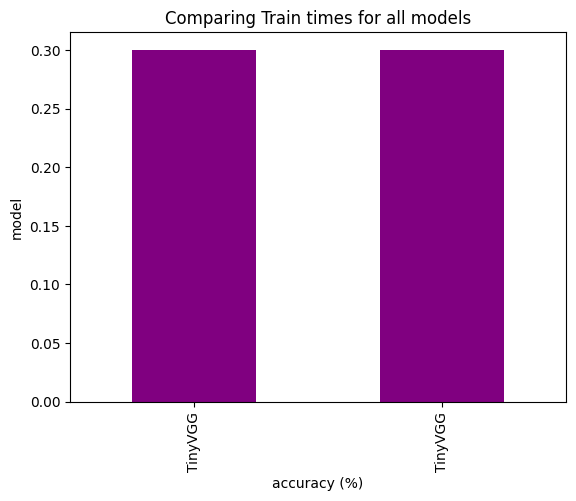

In [53]:
## visualize results
compare_results_vgg.set_index("model_name")["model_acc"].plot(kind="bar", color='purple')
plt.xlabel("accuracy (%)")
plt.ylabel("model")
plt.title("Comparing Train times for all models")
plt.show();

In [54]:
## function to make preds
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  ## list to store prediction probs
  pred_probs = []
  ## put model in eval mode
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample -- add batch dimension and pass to target device
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass -- model outputs raw logits
      pred_logit = model(sample)

      # get prediction probs (raw logits --> pred probs)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  ## torch.stack --> concat list to single tensor
  return torch.stack(pred_probs)

In [55]:
import random
#random.seed(42)
## list of test samples
test_samples = []
test_labels = []

## loop through the test_data (this is not the test_dataloader)
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

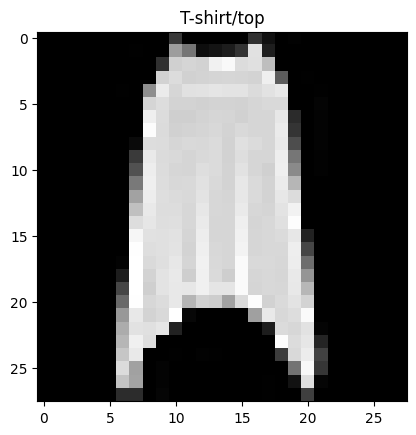

In [56]:
## plot
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]]);

In [58]:
## make predictions
pred_probs = make_predictions(model=vgg_model,
                              data=test_samples)

# view first 2 prediction probs
pred_probs[:2]

tensor([[2.1329e-01, 3.2388e-01, 2.0993e-01, 2.2214e-05, 7.3357e-02, 7.3166e-05,
         1.7928e-01, 3.2613e-06, 2.4197e-05, 1.3702e-04],
        [1.9558e-06, 1.1545e-08, 6.8594e-07, 3.4682e-05, 1.0390e-07, 1.0117e-07,
         2.4235e-07, 2.6628e-06, 9.9996e-01, 2.2806e-07]])

In [59]:
test_labels

[0, 8, 9, 4, 3, 1, 5, 6, 2]

In [60]:
# Convert prediction probabilities to labels
## we need the argmax for each label
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 8, 9, 4, 3, 1, 5, 6, 2])

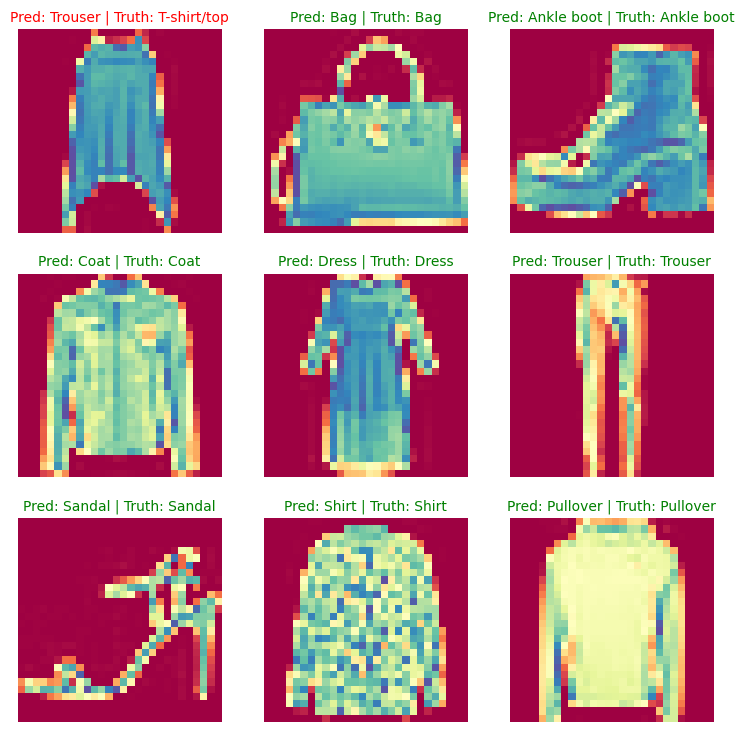

In [62]:
## Plot predictions --> 9 x 9 for 9 random samples
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1) ## index is i+1 becuase we can't start at zero

  # plot target image
  plt.imshow(sample.squeeze(), cmap="Spectral")

  # find prediction label in text form (e.g. "Sandals")
  pred_label = class_names[pred_classes[i]]

  # Get truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # create title for plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if pred same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  ## turn off axis
  plt.axis(False)

Summary
* We can see the `loss` and `accuracy` were the same for the cpu and gpu models but the train_time was much longer for the cpu model which is expected.
* We can see the model appears to be confused on the first row first picture it predicted Trouser but it is actually a T-shirt/Top.
* This is something we can work on later with data augmentation to teach the ML model to see various aspects of the image.

## Plot a confusion matrix comparing your model's predictions to the truth labels.

In [63]:
## see if required packages are installed, if not install them
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  ## assert index higher than 19
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.8 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [65]:
## import tqdm.auto
from tqdm.auto import tqdm

## 1. Make predictions with trained model
y_preds = []
vgg_model.eval() ## model in eval model
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_logit = vgg_model(X)
    # Turn preds from logits --> pred probs --> pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # put preds on CPU for evaluation --> matplotlib needs cpu
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

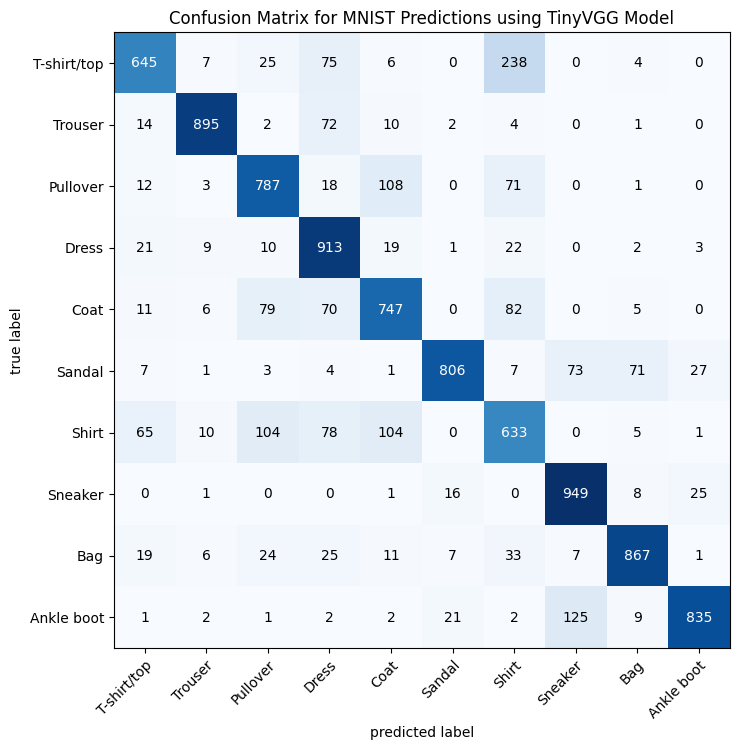

In [66]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), # classes
                          task='multiclass') # classification task
confmat_tensor = confmat(preds=y_pred_tensor,
                           target=test_data.targets)



# 3. plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(12,8),
)
plt.title('Confusion Matrix for MNIST Predictions using TinyVGG Model');


Summary
* We can see in the confusion matrix where the model was wrong on its predictions such as:
1. T-shirt/top was predicted but actual was Shirt 65 times.
2. Pullover was predicted but Shirt was actual 104 times.
3. Coat was predicted but Pullover was actual 108 times.

## Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [67]:
## set manual seed
torch.manual_seed(42)

## create batch of random tensors
images = torch.randn(size=(1, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")

Image batch shape: torch.Size([1, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])


In [68]:
torch.manual_seed(42)

## create single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

## pass through convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

Kernel Size of 3,3 above the output tensor is: `[1, 10, 62, 62]`

In [69]:
## lets increase the kernel_size
torch.manual_seed(42)

## create single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(9,9),
                       stride=1,
                       padding=0)

## pass through convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 56, 56])

Kernel size of 9,9 the output tensor shows that the height and width go DOWN to 56 x 56 with a larger kernel size. This makes sense.

Lets see what happens if we decrase the kernel size, I bet the height and width go up.

In [72]:
## lets increase the kernel_size
torch.manual_seed(42)

## create single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=1,
                       stride=1,
                       padding=0)

## pass through convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

Summary
* The height and width went up to 64 x 64 with the lowest kernel size of 1.
* As we saw above, the larger kernel size --> smaller height and width.
* With a smaller kernel size --> larger height and width.